## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)

## Introduction

In [119]:
# Import necessary library
import json
import requests
import pandas as pd
import numpy as np
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
# import k-means from clustering stage
from sklearn.cluster import KMeans


## Extract data from Wiki

In [46]:
from pandas.io.html import read_html
url='https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok'
wikitable = read_html(url,  attrs={"class":"wikitable"},header =0)
wiki_df = pd.DataFrame(wikitable[0])
wiki_df= wiki_df.rename(columns={'District(Khet)':'District'})
wiki_df= wiki_df.rename(columns={'No. ofSubdistricts(Khwaeng)':'No_of_Subdistricts'})
wiki_df= wiki_df.rename(columns={'Thai':'DistrictThai'})
wiki_df['Latitude'].fillna(0, inplace=True)
wiki_df['Longitude'].fillna(0, inplace=True)
wiki_df.head(11)

,District,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,0.000000,0.000000
1,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500
5,Bang Khun Thian,21,บางขุนเทียน,165491,2,13.660833,100.435833
6,Bang Na,47,บางนา,95912,2,13.680081,100.591800
7,Bang Phlat,25,บางพลัด,99273,4,13.793889,100.505000
8,Bang Rak,4,บางรัก,45875,5,13.730833,100.524167
9,Bang Sue,29,บางซื่อ,132234,2,13.809722,100.537222


In [47]:
wiki_df[wiki_df['Latitude']==0]

,District,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,0.0,0.0
19,Khan Na Yao,43,คันนายาว,88678,2,0.0,0.0
44,Thawi Watthana,48,ทวีวัฒนา,76351,2,0.0,0.0
46,Thung Khru,49,ทุ่งครุ,116473,2,0.0,0.0
47,Wang Thonglang,45,วังทองหลาง,114768,4,0.0,0.0


## Replace NaN on Latitude, Longitude column with Geolocator

In [61]:
geolocator = Nominatim(user_agent="capstone")

In [48]:

for place,latitude,longitude in zip(wiki_df['District'],wiki_df['Latitude'],wiki_df['Longitude']):
    if latitude == 0:
        location = geolocator.geocode(place+' ,Bangkok')
        wiki_df.loc[wiki_df['District'] == place , 'Latitude'] = location.latitude
        wiki_df.loc[wiki_df['District'] == place , 'Longitude'] = location.longitude
        print('The geograpical coordinate of ',place,' are {}, {}.'.format(location.latitude, location.longitude))

The geograpical coordinate of  Bang Bon  are 13.6665033, 100.4288593.
The geograpical coordinate of  Khan Na Yao  are 13.818881399999999, 100.67884832543172.
The geograpical coordinate of  Thawi Watthana  are 13.7726302, 100.3535049.
The geograpical coordinate of  Thung Khru  are 13.625420250000001, 100.49378284953451.
The geograpical coordinate of  Wang Thonglang  are 13.7778858, 100.61173764726523.


In [39]:
wiki_df

,District,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
0,Bang Bon,50,บางบอน,105161,4,13.666503,100.428859
1,Bang Kapi,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,31,บางคอแหลม,94956,3,13.693333,100.502500
5,Bang Khun Thian,21,บางขุนเทียน,165491,2,13.660833,100.435833
6,Bang Na,47,บางนา,95912,2,13.680081,100.591800
7,Bang Phlat,25,บางพลัด,99273,4,13.793889,100.505000
8,Bang Rak,4,บางรัก,45875,5,13.730833,100.524167
9,Bang Sue,29,บางซื่อ,132234,2,13.809722,100.537222


In [40]:
wiki_df.shape

(50, 7)

In [50]:
wiki_df['Population'].sum()

5671070

## Explore latitude and longitude on Map

In [41]:
bangkok = geolocator.geocode(place+' ,Bangkok')

map_bangkok = folium.Map(location=[bangkok.latitude, bangkok.longitude], zoom_start=10)
 
for lat, long, dist, code, pop in zip(wiki_df['Latitude'], wiki_df['Longitude'], wiki_df['District'], \
                                      wiki_df['Code'], wiki_df['Population']):
    label = '{}, {}'.format(code, dist)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=pop/10000,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00FF00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangkok)  
    
map_bangkok

### Define client_id and client_secret for Foursquare

In [42]:
CLIENT_ID='YTJN4JZHLVI5OG5RDOK0RX2DK1R52S25MBFRXQKS2XMXTAWO'
CLIENT_SECRET='0TC5Q5E0LMY2VP02ML0EAQKB0D1USCRPM0HSJDZXZBCOYVR0'
VERSION='20200112'

In [93]:
radius = 5000
LIMIT = 100

venues = []

for lat, long, dist, pop, code in zip(wiki_df['Latitude'], wiki_df['Longitude'], wiki_df['District'], wiki_df['Code'], wiki_df['Population']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for venue in results:
        venues.append((
            dist, 
            code,
            pop,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['id'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [95]:
venues_df = pd.DataFrame(venues)
venues_df.columns = ['District', 'Population', 'Code', 'Latitude', 'Longitude', 'VenueName','VenueId', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
venues_df

,District,Population,Code,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueCategory
0,Bang Bon,105161,50,13.666503,100.428859,ขนมจีนเทวดา บีบเส้นสดๆ,559b4bfc498eb645065670b6,13.659428,100.433692,Noodle House
1,Bang Bon,105161,50,13.666503,100.428859,ไผ่ทองโภชนา,4ca8499a44a8224b303f1640,13.662101,100.435264,Thai Restaurant
2,Bang Bon,105161,50,13.666503,100.428859,UNIQLO (ยูนิโคล่),528ec195498ec899efc22903,13.663285,100.439450,Clothing Store
3,Bang Bon,105161,50,13.666503,100.428859,Starbucks Reserve (สตาร์บัคส์ รีเสิร์ฟ),4bc0040d461576b003b07932,13.663825,100.437668,Coffee Shop
4,Bang Bon,105161,50,13.666503,100.428859,Tops Market (ท็อปส์ มาร์เก็ต),4bdeb42c0ee3a593b28631b0,13.662781,100.437410,Supermarket
5,Bang Bon,105161,50,13.666503,100.428859,องุ่นสเต็ก & เย็นตาโฟ,4bf382bc706e20a16256a898,13.670467,100.419624,Thai Restaurant
6,Bang Bon,105161,50,13.666503,100.428859,After You (อาฟเตอร์ ยู),5ae4393a135b39002c5596b5,13.663298,100.437247,Dessert Shop
7,Bang Bon,105161,50,13.666503,100.428859,MK (เอ็มเค),4ccbba25c0378cfad2388148,13.664320,100.438466,Hotpot Restaurant
8,Bang Bon,105161,50,13.666503,100.428859,ข้าวมันไก่นายเอก (ข้าวมันไก่นายเอก บางบอน),4bee08bc946c0f470164a363,13.679264,100.435036,Asian Restaurant
9,Bang Bon,105161,50,13.666503,100.428859,ก๋วยเตี๋ยวตำลึง นายเอก,54b0d102498e242169091276,13.667102,100.428354,Noodle House


In [97]:
venues_df['VenueId'].head()

0    559b4bfc498eb645065670b6
1    4ca8499a44a8224b303f1640
2    528ec195498ec899efc22903
3    4bc0040d461576b003b07932
4    4bdeb42c0ee3a593b28631b0
Name: VenueId, dtype: object

### Save data to local

In [96]:
venues_df.to_csv("venues_df.csv", sep='\t', encoding='utf-8')

In [99]:
shopping_df = venues_df[venues_df["VenueCategory"]=='Shopping Mall']

In [100]:
bangkok = geolocator.geocode('Bangkok')

map_venues = folium.Map(location=[bangkok.latitude, bangkok.longitude], zoom_start=10)
 
for lat, long, name, cat in zip(shopping_df['VenueLatitude'], shopping_df['VenueLongitude'], shopping_df['VenueName'], \
                                      shopping_df['VenueCategory']):
    label = '{}, {}'.format(name, cat)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, long], popup=label).add_to(map_venues)
#     folium.CircleMarker(
#         [lat, long],
#         radius=pop/10000,
#         popup=label,
#         color='green',
#         fill=True,
#         fill_color='#00FF00',
#         fill_opacity=0.7,
#         parse_html=False).add_to(map_bangkok)  
map_venues

In [101]:
# find a list of unique categories from the API so we can see what may or may not fit for shopping mall

venues_df['VenueCategory'].unique()

array(['Noodle House', 'Thai Restaurant', 'Clothing Store', 'Coffee Shop',
       'Supermarket', 'Dessert Shop', 'Hotpot Restaurant',
       'Asian Restaurant', 'BBQ Joint', 'Park', 'Seafood Restaurant',
       'Fried Chicken Joint', 'Gym / Fitness Center',
       'Furniture / Home Store', 'Pizza Place', 'Chinese Restaurant',
       'Steakhouse', 'Restaurant', 'Shopping Mall', 'Som Tum Restaurant',
       'Bakery', 'Soup Place', 'Department Store',
       'Vietnamese Restaurant', 'Japanese Restaurant', 'Ice Cream Shop',
       'Juice Bar', 'Donut Shop', 'Café', 'Sushi Restaurant', 'Market',
       'Badminton Court', 'Pet Café', 'Brewery', 'Fast Food Restaurant',
       'Bowling Alley', 'Bar', 'Massage Studio', 'Lounge', 'Night Market',
       'Flea Market', 'Coworking Space', 'Pharmacy',
       'Construction & Landscaping', 'Wine Shop', 'Garden Center',
       'Factory', 'Shrine', 'Beer Garden', 'Food Service',
       'Japanese Curry Restaurant', 'Comic Shop', 'Soccer Field',
       'P

In [84]:
no_of_shopping_mall = shopping_df['District'].value_counts()


In [79]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style


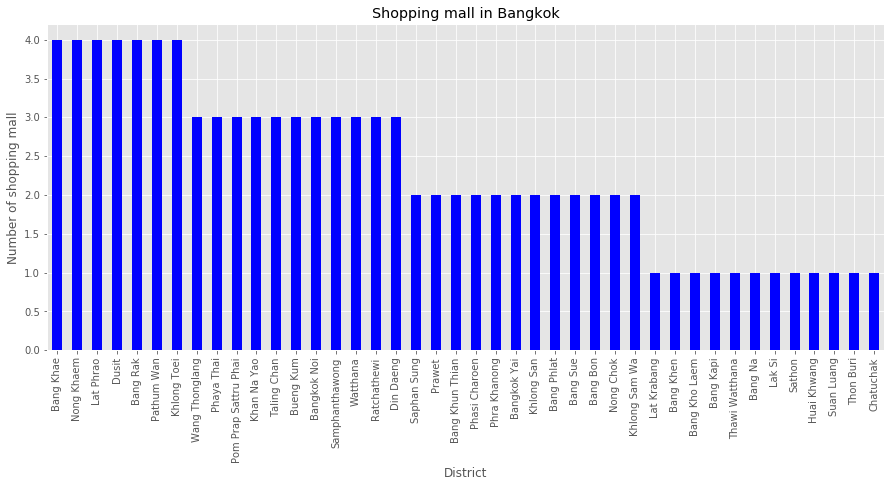

In [87]:
no_of_shopping_mall.plot(kind='bar',  color='blue', figsize=(15, 6))

plt.xlabel('District') # add to x-label to the plot
plt.ylabel('Number of shopping mall') # add y-label to the plot
plt.title('Shopping mall in Bangkok') # add title to the plot

plt.show()

In [103]:
# one hot encoding
df_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['District'] = venues_df['District'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()

(4886, 212)


,District,Airport,Airport Lounge,Airport Service,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Veterinarian,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_grouped = df_onehot.groupby(["District"]).mean().reset_index()

print(df_grouped.shape)
df_grouped.head()

(50, 212)


,District,Airport,Airport Lounge,Airport Service,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Veterinarian,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Bang Bon,0.0,0.0,0.0,0.0,0.0,0.00,0.03,0.0,0.03,...,0.0,0.01,0.00,0.00,0.0,0.01,0.0,0.0,0.0,0.0
1,Bang Kapi,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.01,...,0.0,0.02,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,Bang Khae,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.0,0.07,...,0.0,0.01,0.01,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,Bang Khen,0.0,0.0,0.0,0.0,0.0,0.01,0.03,0.0,0.02,...,0.0,0.03,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
4,Bang Kho Laem,0.0,0.0,0.0,0.0,0.0,0.00,0.06,0.0,0.01,...,0.0,0.00,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0


In [109]:
len(df_grouped[df_grouped["Shopping Mall"] > 0])

42

In [110]:
df_mall = df_grouped[["District","Shopping Mall"]]

### Cluster districts in Bangkok using K-Mean

In [113]:
# set number of clusters
kclusters = 3

df_clustering = df_mall.drop(["District"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 1, 0, 0, 2, 0, 2, 1, 2])

In [114]:
df_clustered = df_mall.copy()

# add clustering labels
df_clustered["Cluster"] = kmeans.labels_
df_clustered.head()

,District,Shopping Mall,Cluster
0,Bang Bon,0.02,2
1,Bang Kapi,0.01,0
2,Bang Khae,0.04,1
3,Bang Khen,0.01,0
4,Bang Kho Laem,0.01,0


In [115]:
# add latitude/longitude for each district
df_clustered = df_clustered.join(wiki_df.set_index("District"), on="District")

print(df_clustered.shape)
df_clustered.head()

(50, 9)


,District,Shopping Mall,Cluster,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
0,Bang Bon,0.02,2,50,บางบอน,105161,4,13.666503,100.428859
1,Bang Kapi,0.01,0,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,0.04,1,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,0.01,0,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,0.01,0,31,บางคอแหลม,94956,3,13.693333,100.502500


In [127]:
bangkok = geolocator.geocode(place+' ,Bangkok')

map_clusters = folium.Map(location=[bangkok.latitude, bangkok.longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['District'], df_clustered['Cluster']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [122]:
df_clustered.loc[df_clustered['Cluster'] == 0].head()

,District,Shopping Mall,Cluster,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
1,Bang Kapi,0.01,0,6,บางกะปิ,148465,2,13.765833,100.647778
3,Bang Khen,0.01,0,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,0.01,0,31,บางคอแหลม,94956,3,13.693333,100.502500
6,Bang Na,0.01,0,47,บางนา,95912,2,13.680081,100.591800
13,Chatuchak,0.01,0,30,จตุจักร,160906,5,13.828611,100.559722


In [123]:
df_clustered.loc[df_clustered['Cluster'] == 1].head()

,District,Shopping Mall,Cluster,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
2,Bang Khae,0.04,1,40,บางแค,191781,4,13.696111,100.409444
8,Bang Rak,0.04,1,4,บางรัก,45875,5,13.730833,100.524167
17,Dusit,0.04,1,2,ดุสิต,107655,5,13.776944,100.520556
22,Khlong Toei,0.04,1,33,คลองเตย,109041,3,13.708056,100.583889
25,Lat Phrao,0.04,1,38,ลาดพร้าว,122182,2,13.803611,100.607500


In [124]:
df_clustered.loc[df_clustered['Cluster'] == 2].head()

,District,Shopping Mall,Cluster,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
0,Bang Bon,0.02,2,50,บางบอน,105161,4,13.666503,100.428859
5,Bang Khun Thian,0.02,2,21,บางขุนเทียน,165491,2,13.660833,100.435833
7,Bang Phlat,0.02,2,25,บางพลัด,99273,4,13.793889,100.505000
9,Bang Sue,0.02,2,29,บางซื่อ,132234,2,13.809722,100.537222
10,Bangkok Noi,0.03,2,20,บางกอกน้อย,117793,5,13.770867,100.467933


In [128]:
df_clustered


,District,Shopping Mall,Cluster,Code,DistrictThai,Population,No_of_Subdistricts,Latitude,Longitude
0,Bang Bon,0.020000,2,50,บางบอน,105161,4,13.666503,100.428859
1,Bang Kapi,0.010000,0,6,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,0.040000,1,40,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,0.010000,0,5,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,0.010000,0,31,บางคอแหลม,94956,3,13.693333,100.502500
5,Bang Khun Thian,0.020000,2,21,บางขุนเทียน,165491,2,13.660833,100.435833
6,Bang Na,0.010000,0,47,บางนา,95912,2,13.680081,100.591800
7,Bang Phlat,0.020000,2,25,บางพลัด,99273,4,13.793889,100.505000
8,Bang Rak,0.040000,1,4,บางรัก,45875,5,13.730833,100.524167
9,Bang Sue,0.020000,2,29,บางซื่อ,132234,2,13.809722,100.537222
